In [ ]:
import pandas as pd

df = pd.read_csv("/content/loan_approval_dataset.csv")

print("Missing Values per Column:\n")
print(df.isnull().sum())

print("Data Info:\n")
print(df.info())

df.columns = df.columns.str.strip()

print(df['loan_status'].value_counts())


Missing Values per Column:

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64
Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int6

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Drop first column (Assume it's an ID)
df.drop(df.columns[0], axis=1, inplace=True)

df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()


# 4️⃣ Encode categorical columns (Education & Self_Employed)
df['education'] = df['education'].map({'Graduate':1, 'Not Graduate':0})
df['self_employed'] = df['self_employed'].map({'Yes':1, 'No':0})
df['loan_status'] = df['loan_status'].map({'Approved':1, 'Rejected':0})


In [ ]:
print(df)

      no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                    2          1              0       9600000     29900000   
1                    0          0              1       4100000     12200000   
2                    3          1              0       9100000     29700000   
3                    3          1              0       8200000     30700000   
4                    5          0              1       9800000     24200000   
...                ...        ...            ...           ...          ...   
4264                 5          1              1       1000000      2300000   
4265                 0          0              1       3300000     11300000   
4266                 2          0              0       6500000     23900000   
4267                 1          0              0       4100000     12800000   
4268                 1          1              0       9200000     29700000   

      loan_term  cibil_score  residential_assets_va

In [ ]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


Accuracy: 0.9789227166276346

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       484
           1       0.98      0.98      0.98       797

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



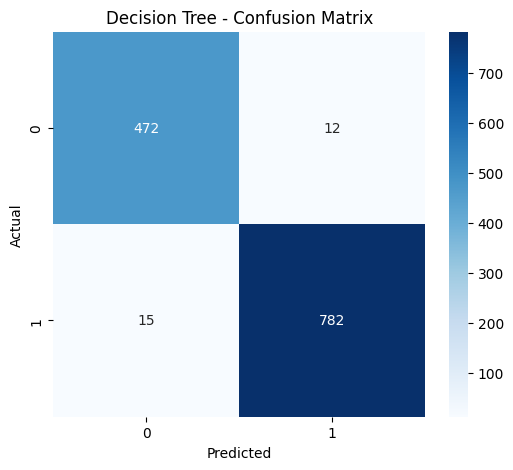

In [ ]:
dt = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42
)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

Accuracy: 0.9297423887587822

 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       484
           1       0.97      0.92      0.94       797

    accuracy                           0.93      1281
   macro avg       0.92      0.93      0.93      1281
weighted avg       0.93      0.93      0.93      1281



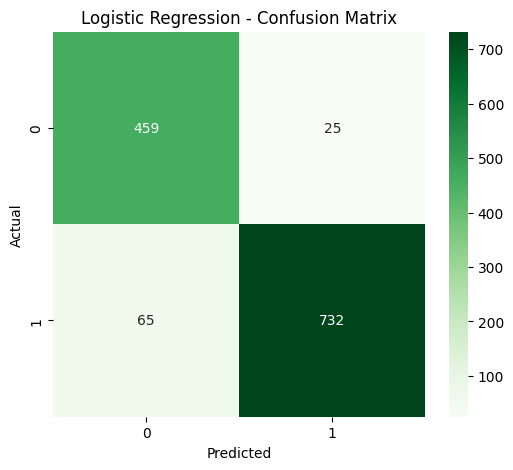

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

lr = LogisticRegression(
    class_weight='balanced',
    random_state=42,
    max_iter=1000
)

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\n Classification Report:\n", classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


**Now will using SMOTE to balance data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

df = pd.read_csv("/content/loan_approval_dataset.csv")

df.columns = df.columns.str.strip()
print("Missing Values per Column:\n", df.isnull().sum())
print(df['loan_status'].value_counts())

df.drop(df.columns[0], axis=1, inplace=True)

df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()

df['education'] = df['education'].map({'Graduate':1, 'Not Graduate':0})
df['self_employed'] = df['self_employed'].map({'Yes':1, 'No':0})
df['loan_status'] = df['loan_status'].map({'Approved':1, 'Rejected':0})

X = df.drop("loan_status", axis=1)
y = df["loan_status"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)



Missing Values per Column:
 loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


In [ ]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", pd.Series(y_train_res).value_counts())


Before SMOTE:
 loan_status
1    1859
0    1129
Name: count, dtype: int64
After SMOTE:
 loan_status
1    1859
0    1859
Name: count, dtype: int64


Accuracy: 0.9804839968774395

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       484
           1       0.99      0.98      0.98       797

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



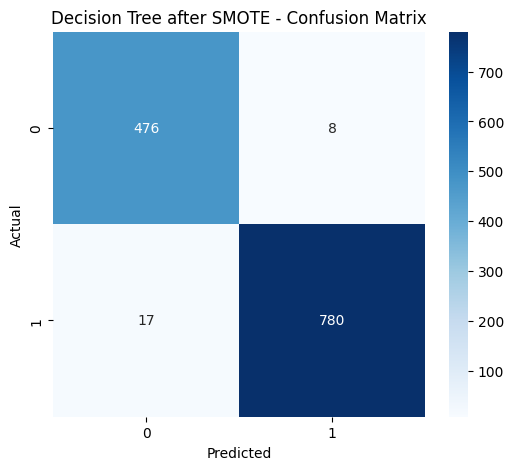

In [ ]:

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)

y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree after SMOTE - Confusion Matrix")
plt.show()


Logistic Regression Accuracy: 0.927400468384075

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       484
           1       0.96      0.92      0.94       797

    accuracy                           0.93      1281
   macro avg       0.92      0.93      0.92      1281
weighted avg       0.93      0.93      0.93      1281



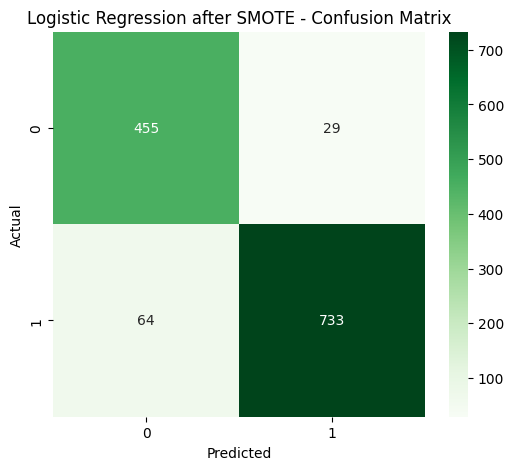

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_res, y_train_res)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression after SMOTE - Confusion Matrix")
plt.show()
